In [1]:
"""Design RNN or its variant including LSTM or GRU a) Select a suitable time series dataset. Example 
 predict sentiments based on product reviews b) Apply for prediction"""

'Design RNN or its variant including LSTM or GRU a) Select a suitable time series dataset. Example \n predict sentiments based on product reviews b) Apply for prediction'

In [2]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset with only the top 10,000 most common words
vocab_size = 10000
max_len = 200  # pad or truncate reviews to this length

In [4]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 12s 1us/step


In [5]:
# Pad sequences
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [11]:
# LSTM MODEL
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    LSTM(128),
    Dense(1, activation='sigmoid')  # Binary classification (positive/negative)
])

In [8]:
# compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 61s 366ms/step - accuracy: 0.6266 - loss: 0.6105 - val_accuracy: 0.8444 - val_loss: 0.3561
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 57s 360ms/step - accuracy: 0.8882 - loss: 0.2887 - val_accuracy: 0.8712 - val_loss: 0.3094
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 60s 384ms/step - accuracy: 0.9306 - loss: 0.1856 - val_accuracy: 0.8736 - val_loss: 0.3129
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 56s 353ms/step - accuracy: 0.9493 - loss: 0.1436 - val_accuracy: 0.8736 - val_loss: 0.3258
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 56s 359ms/step - accuracy: 0.9608 - loss: 0.1100 - val_accuracy: 0.8630 - val_loss: 0.4245


In [10]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.8576 - loss: 0.4535
Test Accuracy: 85.72%


In [12]:
# Predict
y_pred = (model.predict(X_test) > 0.5).astype("int32")

782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step


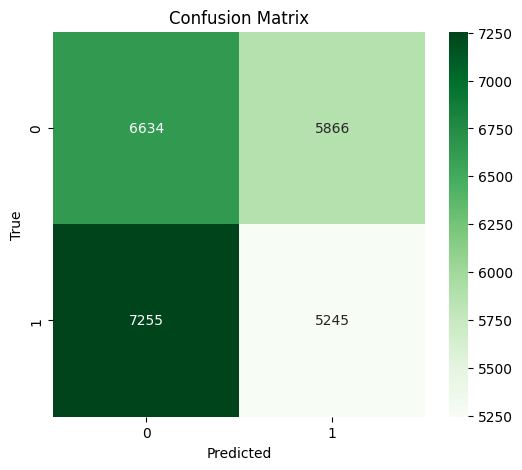

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [14]:
# Classification Report
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

              precision    recall  f1-score   support

    Negative       0.48      0.53      0.50     12500
    Positive       0.47      0.42      0.44     12500

    accuracy                           0.48     25000
   macro avg       0.47      0.48      0.47     25000
weighted avg       0.47      0.48      0.47     25000

